
# Introduction
This case study aims to find trends in the fitness tracker industry to help Bellabeat improve their health-focused products for women. Bellabeat is a high-tech manufacture invested in developing health focused products for women. It is Bellabeat mission to empower women through the means of personal health. Therefore, it is important for Bellabeat to continue developing its products.

To find trends in the fitness tracker industry and improve Bellabeats' products, we will use the six step Data Analysis process: 
* **Ask**
* **Prepare**
* **Process**
* **Analyze**
* **Share**
* **Act**

## 1. Ask
We will analyze smart fitness tracker devices usage data in order to gain insight into how non-Bellabeat consumers use smart devices to track their health and overall fitness. To make Bellabeat a more successful company and enrich the lives of its user we will address the following business tasks:

1. What are some trends in smart device usage?

2. How could these trends apply to Bellabeat customers?

3. How could these trends help influence Bellabeat marketing strategy?


### Key Stakeholders
1. **Urška Sršen:** Cofounder and Chief Creative Officer at Bellabeat.
2. **Sando Mur:** Cofounder and key member of the Bellabeat executive team.
3. **Marketing analytics team at Bellabeat:** A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.
4. **Customers:** Everyone who purchases their product or use Bellabeat’s services.

## 2. Prepare
The data we will be using for analysis is the [Fitbit Fitness tracker data](https://www.kaggle.com/datasets/arashnic/fitbit), a public Dataset. Fitbit is a smart watch that is specifically made for fitness tracking. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits. The data stored was for a full month, 4/12/2016 to 5/12/2016. Some limitations for this data set is that we only have data from 30 users and we don't know their gender. Additionally, all the daily activity for each user is not available.


**Data ROCCC Analysis:**

* Reliable: &nbsp;&ensp;&emsp;&emsp;&emsp;Yes, the dataset is reliable as the sample size is >=30 FitBit users.

* Original: &emsp;&emsp;&emsp;&emsp;Yes. Even though this is a third-party data, the quality of the data is not questionable.

* Comprehensive: &ensp;Yes, it contains all crirical information. The data collected also matches Bellabeat’s products.

* Current: &nbsp;&emsp;&emsp;&emsp;&emsp;Yes, the data is still current since it is not older than 10 years.

* Cited: &nbsp;&emsp;&emsp;&emsp;&emsp;&emsp;Yes

## 3. Process
Before we get into analyzing the data, we will load the required Python libraries and clean the data. To perform the necessary analysis we will use the Pandas and Seaborn libraries that will allow us to import, clean, analyze and visualize our data sets. We will clean our data to ensure the accuracy, completeness and consistency so that we arrive at the correct conclusions.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datsets
#### Parsing Date Columns as DateTime Objects

In [2]:
# Importing our datsets
# Parsing Date columns as DateTime Objects
Act_log = pd.read_csv('FitBit_Data\\dailyActivity_merged.csv', parse_dates=['ActivityDate'])
Sleep_log = pd.read_csv('FitBit_Data\\sleepDay_merged.csv', parse_dates=['SleepDay'])
Weight_log = pd.read_csv('FitBit_Data\\weightLogInfo_merged.csv', parse_dates=['Date'])
hr_steps = pd.read_csv('FitBit_Data\\hourlySteps_merged.csv', parse_dates=['ActivityHour'])
hr_calories = pd.read_csv('FitBit_Data\\hourlyCalories_merged.csv', parse_dates=['ActivityHour'])

### Exploring the datasets

In [3]:
Act_log.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
Sleep_log.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [5]:
Weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [6]:
hr_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [7]:
hr_calories.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


### Checking Columns, Data Types & Null Values

In [8]:
print("\033[1m" + 'Daily Activity:' + "\033[0m")
Act_log.info()
print('\n')
print("\033[1m" + 'Sleep Day:' + "\033[0m")
Sleep_log.info()
print('\n')
print("\033[1m" + 'Weight Log:' + "\033[0m")
Weight_log.info()
print('\n')
print("\033[1m" + 'Hourly Steps:' + "\033[0m")
hr_steps.info()
print('\n')
print("\033[1m" + 'Hourly Calories:' + "\033[0m")
hr_calories.info()

Daily Activity:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  Lightl

In [9]:
# Dropping 'Fat' column as it has only 2 non-null values
Weight_log = Weight_log.drop('Fat', axis=1)

### Checking how many unique users are present in each dataset

In [10]:
print('Daily Activity:', Act_log['Id'].nunique(), 'Unique FitBit users')
print('Sleep Day:', Sleep_log['Id'].nunique(), 'Unique FitBit users')
print('Weight Log:', Weight_log['Id'].nunique(), 'Unique FitBit users')
print('Hourly Steps:', hr_steps['Id'].nunique(), 'Unique FitBit users')
print('Hourly Calories:', hr_calories['Id'].nunique(), 'Unique FitBit users')

Daily Activity: 33 Unique FitBit users
Sleep Day: 24 Unique FitBit users
Weight Log: 8 Unique FitBit users
Hourly Steps: 33 Unique FitBit users
Hourly Calories: 33 Unique FitBit users


### Checking for duplicate records in each dataset except 'Weight Log'
**'Weight Log' Dataset has very small number of users Data**

In [11]:
print('Daily Activity dataset has:', Act_log.duplicated().sum(), 'duplicate records')
print('Sleep Day dataset has:', Sleep_log.duplicated().sum(), 'duplicate records')
print('Hourly Steps dataset has:', hr_steps.duplicated().sum(), 'duplicate records')
print('Hourly Calories dataset has:', hr_calories.duplicated().sum(), 'duplicate records')

Daily Activity dataset has: 0 duplicate records
Sleep Day dataset has: 3 duplicate records
Hourly Steps dataset has: 0 duplicate records
Hourly Calories dataset has: 0 duplicate records


In [12]:
# Dropping 3 duplicated records in 'Sleep Log'
Sleep_log = Sleep_log.drop(Sleep_log[Sleep_log.duplicated()].index)

### Transforming Data

In [13]:
# Merging 'Hourly Steps' and 'Hourly Calories' as both datasets has similar structure
print("Shape of 'Hourly Steps' Dataset:",hr_steps.shape)
print("Shape of 'Hourly Calories' Dataset:",hr_calories.shape)
print("Columns in 'Hourly Steps' Dataset:",hr_steps.columns)
print("Columns in 'Hourly Steps' Dataset:",hr_calories.columns)

Shape of 'Hourly Steps' Dataset: (22099, 3)
Shape of 'Hourly Calories' Dataset: (22099, 3)
Columns in 'Hourly Steps' Dataset: Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Columns in 'Hourly Steps' Dataset: Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


In [14]:
hourly_data = pd.merge(hr_steps, hr_calories, how = 'inner', on = ['Id','ActivityHour'])
hourly_data

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514,126
22095,8877689391,2016-05-12 11:00:00,1407,192
22096,8877689391,2016-05-12 12:00:00,3135,321
22097,8877689391,2016-05-12 13:00:00,307,101


#### Creating 'WeekDay' Column from DateTime columns in each dataset

In [15]:
Sleep_log['WeekDay'] = Sleep_log['SleepDay'].dt.day_name()
Act_log['WeekDay'] = Act_log['ActivityDate'].dt.day_name()
hourly_data['WeekDay'] = hourly_data['ActivityHour'].dt.day_name()

In [16]:
Sleep_log.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [17]:
Act_log.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [18]:
hourly_data.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


In [19]:
# Creating 'DayHour' column by extracting hour from 'ActivityHour' column in hourly_data
hourly_data['DayHour'] = hourly_data['ActivityHour'].dt.hour

In [20]:
# Extracting Date in 'ActivityHour'
hourly_data['ActivityDate'] = hourly_data['ActivityHour'].dt.date

In [21]:
# Dropping 'ActivityHour' column
hourly_data = hourly_data.drop('ActivityHour', axis=1)

In [22]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   StepTotal     22099 non-null  int64 
 2   Calories      22099 non-null  int64 
 3   WeekDay       22099 non-null  object
 4   DayHour       22099 non-null  int64 
 5   ActivityDate  22099 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


In [23]:
# Converting 'ActivityDate' column Data type to DateTime

In [24]:
hourly_data['ActivityDate'] = pd.to_datetime(hourly_data['ActivityDate'])
hourly_data.head()

,Id,StepTotal,Calories,WeekDay,DayHour,ActivityDate
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


#### Merging 'Sleep_log' and 'hourly_data'

In [25]:
Sleep_log = Sleep_log.rename(columns={'SleepDay':'ActivityDate'})
Sleep_log.head()

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [26]:
merge_Sl_Hr = pd.merge(Sleep_log, hourly_data, how = 'inner', on = ['Id','ActivityDate','WeekDay'])
merge_Sl_Hr.head()

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay,StepTotal,Calories,DayHour
0,1503960366,2016-04-12,1,327,346,Tuesday,373,81,0
1,1503960366,2016-04-12,1,327,346,Tuesday,160,61,1
2,1503960366,2016-04-12,1,327,346,Tuesday,151,59,2
3,1503960366,2016-04-12,1,327,346,Tuesday,0,47,3
4,1503960366,2016-04-12,1,327,346,Tuesday,0,48,4


In [27]:
print('merge_Sl_Hr Dataset has', merge_Sl_Hr['Id'].nunique(), 'Unique FitBit users and', merge_Sl_Hr.isnull().values.sum(), 'null values')

merge_Sl_Hr Dataset has 24 Unique FitBit users and 0 null values


#### Creating additional columns in 'Daily Activity' Dataset

In [28]:
Act_log.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [29]:
Act_log['TotalActiveMinutes'] = Act_log['VeryActiveMinutes'] + Act_log['FairlyActiveMinutes'] + Act_log['LightlyActiveMinutes']
Act_log['TotalActiveHours'] = np.round(Act_log['TotalActiveMinutes']/60)
Act_log['TotalMinutes'] = Act_log['TotalActiveMinutes'] + Act_log['SedentaryMinutes']

In [30]:
Act_log[['TotalActiveMinutes', 'TotalActiveHours', 'TotalMinutes']].head()

,TotalActiveMinutes,TotalActiveHours,TotalMinutes
0,366,6.0,1094
1,257,4.0,1033
2,222,4.0,1440
3,272,5.0,998
4,267,4.0,1040


## 4. Analyze
#### After processing, We have Two Datasets to analyze:
1. `Act_log`
2. `Merge_Sl_Hr`

#### Let's do some statistical analysis.

In [31]:
Act_log.describe().transpose().drop('Id')

,count,mean,std,min,25%,50%,75%,max
TotalSteps,940.0,7637.910638,5087.150742,0.0,3789.750,7405.500,10727.0000,36019.000000
TotalDistance,940.0,5.489702,3.924606,0.0,2.620,5.245,7.7125,28.030001
TrackerDistance,940.0,5.475351,3.907276,0.0,2.620,5.245,7.7100,28.030001
LoggedActivitiesDistance,940.0,0.108171,0.619897,0.0,0.000,0.000,0.0000,4.942142
VeryActiveDistance,940.0,1.502681,2.658941,0.0,0.000,0.210,2.0525,21.920000
ModeratelyActiveDistance,940.0,0.567543,0.883580,0.0,0.000,0.240,0.8000,6.480000
LightActiveDistance,940.0,3.340819,2.040655,0.0,1.945,3.365,4.7825,10.710000
SedentaryActiveDistance,940.0,0.001606,0.007346,0.0,0.000,0.000,0.0000,0.110000
VeryActiveMinutes,940.0,21.164894,32.844803,0.0,0.000,4.000,32.0000,210.000000
FairlyActiveMinutes,940.0,13.564894,19.987404,0.0,0.000,6.000,19.0000,143.000000


In [32]:
merge_Sl_Hr.describe().transpose().drop('Id')

,count,mean,std,min,25%,50%,75%,max
TotalSleepRecords,9699.0,1.121250,0.348436,1.0,1.0,1.0,1.0,3.0
TotalMinutesAsleep,9699.0,419.051036,119.086005,58.0,361.0,432.0,490.0,796.0
TotalTimeInBed,9699.0,458.449118,127.957661,61.0,402.5,463.0,527.0,961.0
StepTotal,9699.0,357.678420,652.315167,0.0,0.0,107.0,419.0,6357.0
Calories,9699.0,100.636560,63.093154,42.0,63.0,84.0,116.0,669.0
DayHour,9699.0,11.422312,6.921310,0.0,5.0,11.0,17.0,23.0


### Checking Correlation

In [33]:
corr = Act_log[['TotalSteps','TotalDistance','SedentaryMinutes','TotalActiveMinutes','Calories']].corr()
corr

,TotalSteps,TotalDistance,SedentaryMinutes,TotalActiveMinutes,Calories
TotalSteps,1.000000,0.985369,-0.327484,0.772429,0.591568
TotalDistance,0.985369,1.000000,-0.288094,0.722605,0.644962
SedentaryMinutes,-0.327484,-0.288094,1.000000,-0.475258,-0.106973
TotalActiveMinutes,0.772429,0.722605,-0.475258,1.000000,0.471997
Calories,0.591568,0.644962,-0.106973,0.471997,1.000000


### Key Findings:
1. On average, 2303 calories burnt per day
2. Out of 1218 Total Minutes, only 227 minutes (3.77 Hours) a user has been active. Around 991 minutes, a user has been inactive.
3. Average number of steps taken by user: 7638
4. Positive correlation between steps taken and calories burnt.
5. 75% of users take around 11000 steps per day and burn around 2800 Calories per day.

#### Creating new column 'UserType' to categorize Normal and Very Active Users

In [34]:
Act_log.groupby('Id').mean()['Calories'].sort_values()

Id
1624580081    1483.354839
3977333714    1513.666667
2026352035    1540.645161
1844505072    1573.483871
2320127002    1724.161290
8253242879    1788.000000
1503960366    1816.419355
5553957443    1875.677419
2873212765    1916.967742
3372868164    1933.100000
8792009665    1962.310345
4057192912    1973.750000
6962181067    1982.032258
4558609924    2033.258065
4319703577    2037.677419
2347167796    2043.444444
6775888955    2131.769231
1927972279    2172.806452
4445114986    2186.193548
6117666160    2261.142857
4020332650    2385.806452
2022484408    2509.967742
7007744171    2544.000000
7086361926    2566.354839
6290855005    2599.620690
8583815059    2732.032258
1644430081    2811.300000
8053475328    2945.806452
4702921684    2965.548387
4388161847    3093.870968
5577150313    3359.633333
8877689391    3420.258065
8378563200    3436.580645
Name: Calories, dtype: float64

In [35]:
Act_log['AvgCaloriesUser'] = Act_log['Calories'].groupby(Act_log['Id']).transform('mean')

In [36]:
Act_log['UserType'] = Act_log['AvgCaloriesUser'].apply(lambda val: 'Normal User' if val<2800 else 'Very Active User')

In [37]:
Act_log.sample(10)[['Id','Calories','AvgCaloriesUser', 'UserType']]

,Id,Calories,AvgCaloriesUser,UserType
582,5577150313,3294,3359.633333,Very Active User
508,4702921684,2896,2965.548387,Very Active User
363,4020332650,1980,2385.806452,Normal User
703,6962181067,2066,1982.032258,Normal User
603,6117666160,2018,2261.142857,Normal User
795,8053475328,2765,2945.806452,Very Active User
864,8583815059,3142,2732.032258,Normal User
575,5577150313,3192,3359.633333,Very Active User
284,2873212765,1739,1916.967742,Normal User
454,4445114986,2149,2186.193548,Normal User


In [38]:
merge_Sl_Hr = pd.merge(merge_Sl_Hr,Act_log[['Id','UserType','ActivityDate']],how='inner')

## 5. Share
#### Let's do some data visualizations to share insights 

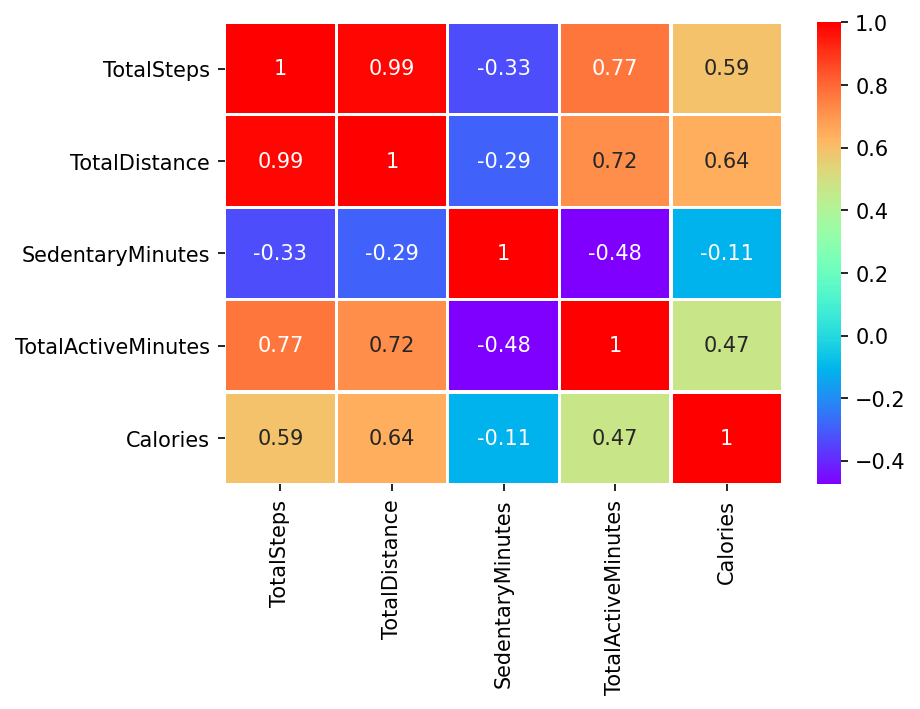

In [39]:
plt.figure(figsize=(6,4), dpi=150)
sns.heatmap(data=corr, cmap='rainbow', lw=1, annot=True)
plt.show()

* There is a +ve correlation between Calories, TotalActiveMinutes, TotalSteps & Total Distance
* There is a weak -ve correlation between SedentaryMinutes & Calories

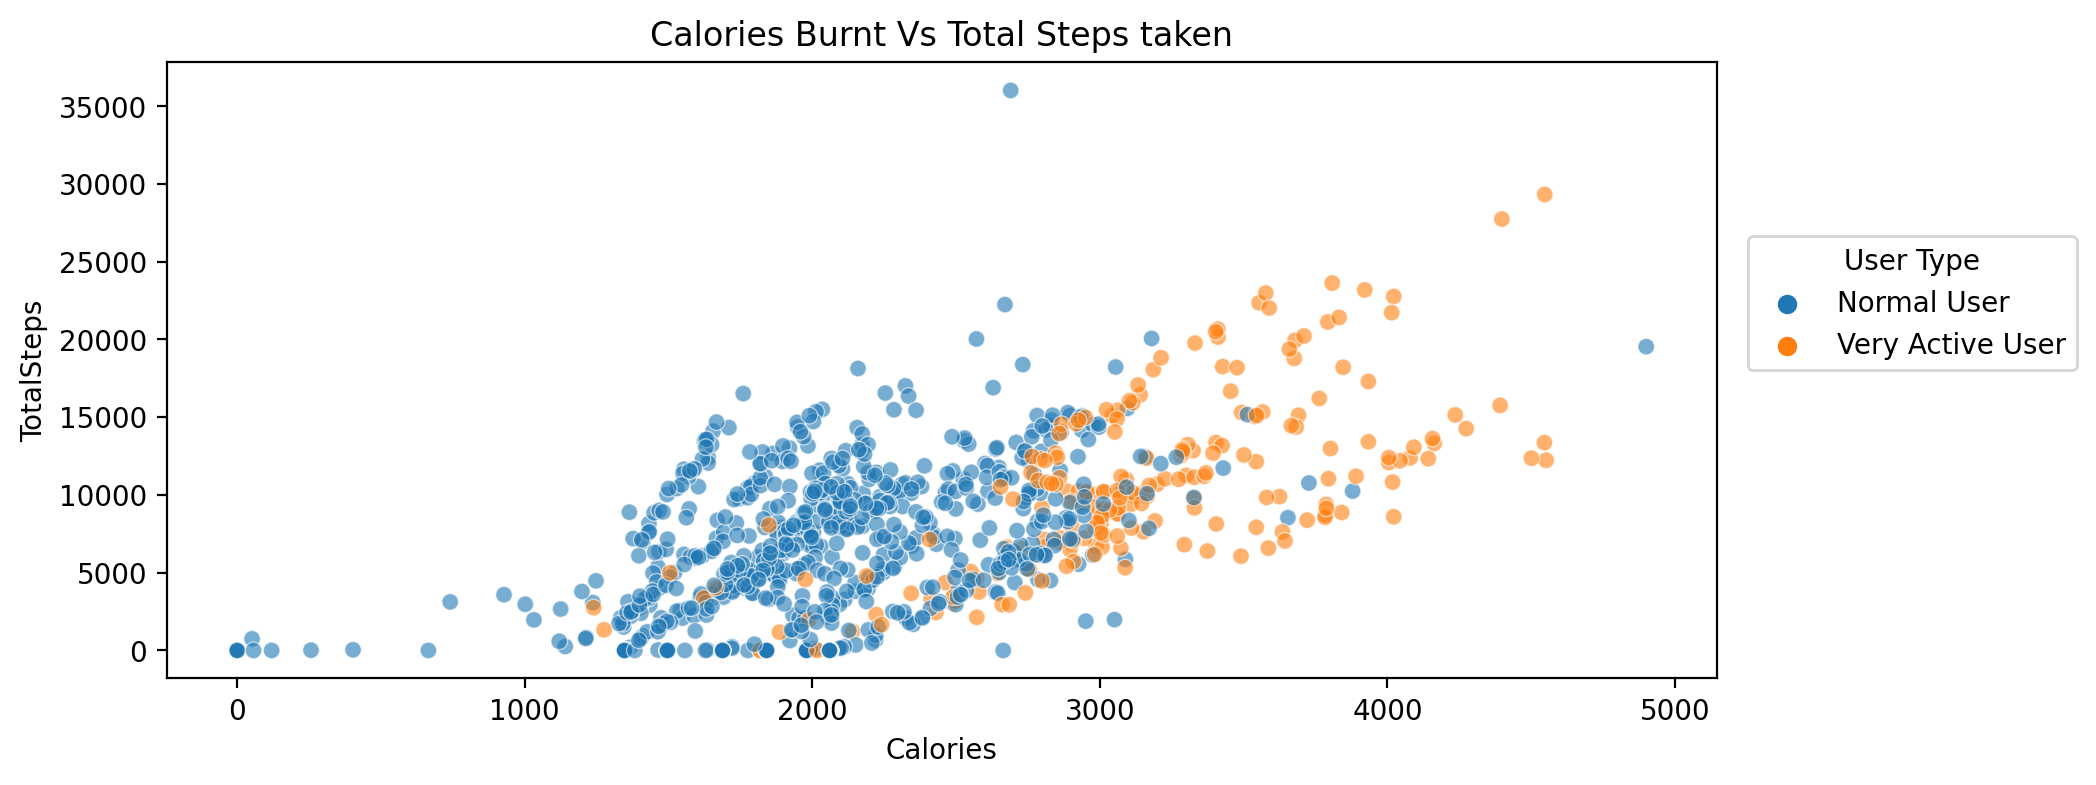

In [40]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=Act_log, x='Calories', y='TotalSteps', alpha=0.6, hue='UserType')
plt.title('Calories Burnt Vs Total Steps taken')
plt.legend(loc=(1.02,0.5), title='User Type')
plt.show()

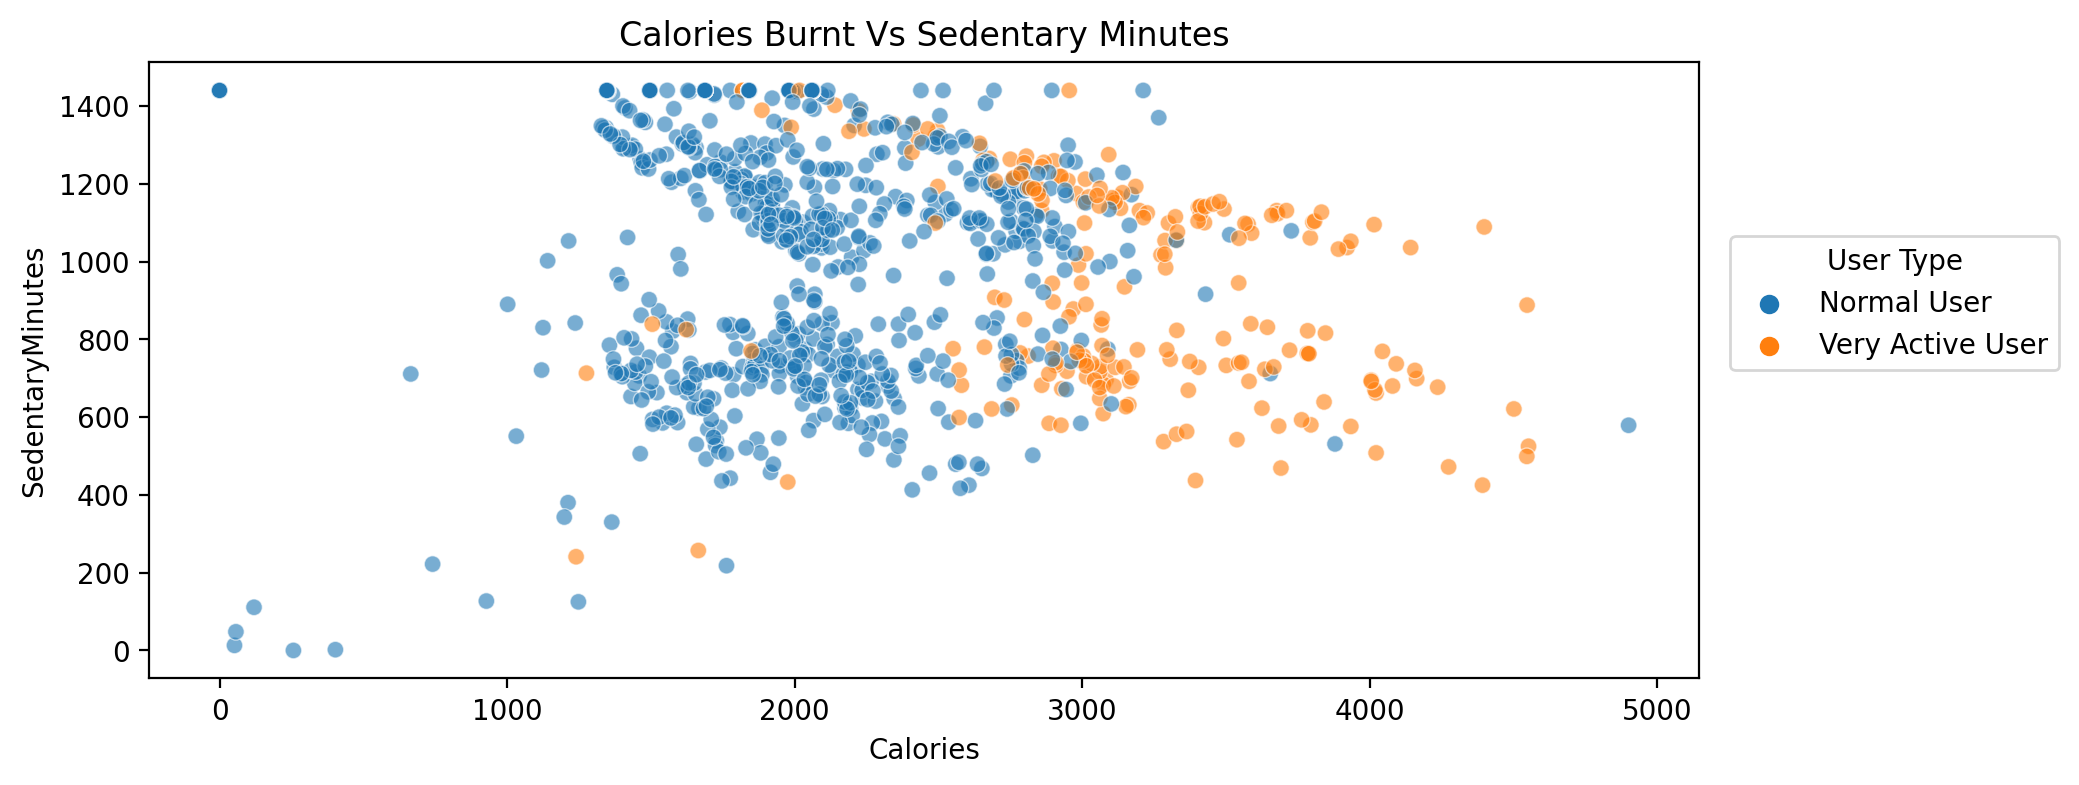

In [41]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=Act_log, x='Calories', y='SedentaryMinutes', hue='UserType', alpha=0.6)
plt.title('Calories Burnt Vs Sedentary Minutes')
plt.legend(loc=(1.02,0.5), title='User Type')
plt.show()

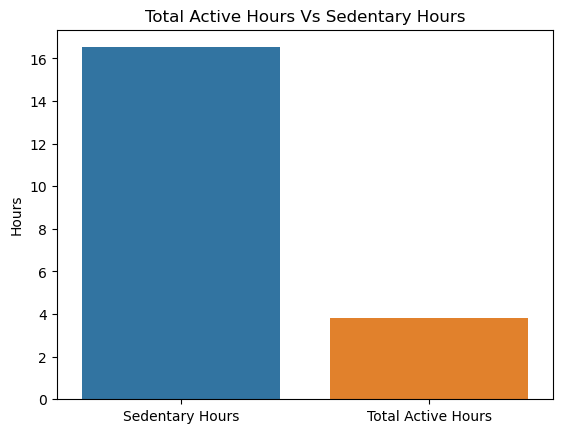

In [42]:
data = Act_log[['SedentaryMinutes', 'TotalActiveMinutes']].mean()/60
data.index = ['Sedentary Hours', 'Total Active Hours']
sns.barplot(x=data.index, y=data.values)
plt.ylabel('Hours')
plt.title('Total Active Hours Vs Sedentary Hours')
plt.show()

* Total Active Hours are way lower than Sedentary Hours
* Users spend more time sitting or lying down. This might be due to their occupation or lifestyle. Most likely they belong to the working class that spends numerous hours sitting at their desk.


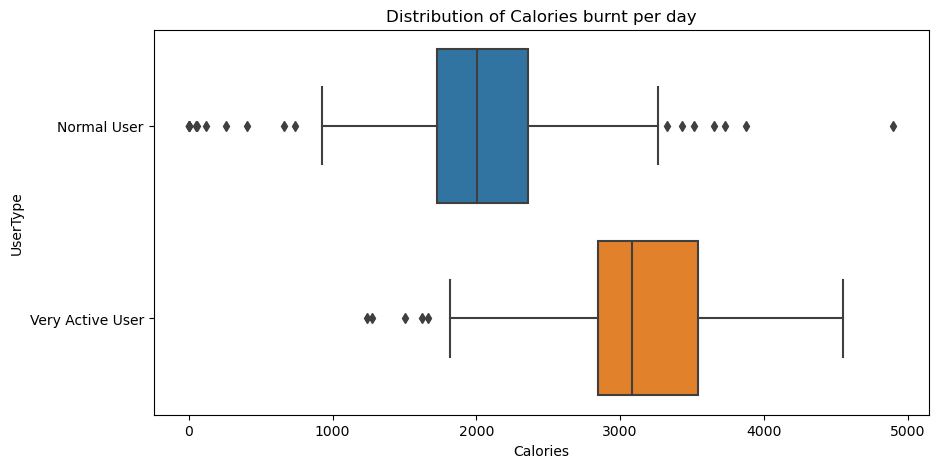

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(data = Act_log, x= 'Calories', y = 'UserType')
plt.title('Distribution of Calories burnt per day')
plt.show()

* The above box plot shows the average calories burnt by Normal and Very Active Users. There are some outliers.
* Median for Average calories burnt by Normal Users is around 2000 calories per day.
* Median for Average calories burnt by Very Active Users is around 3100 calories per day.

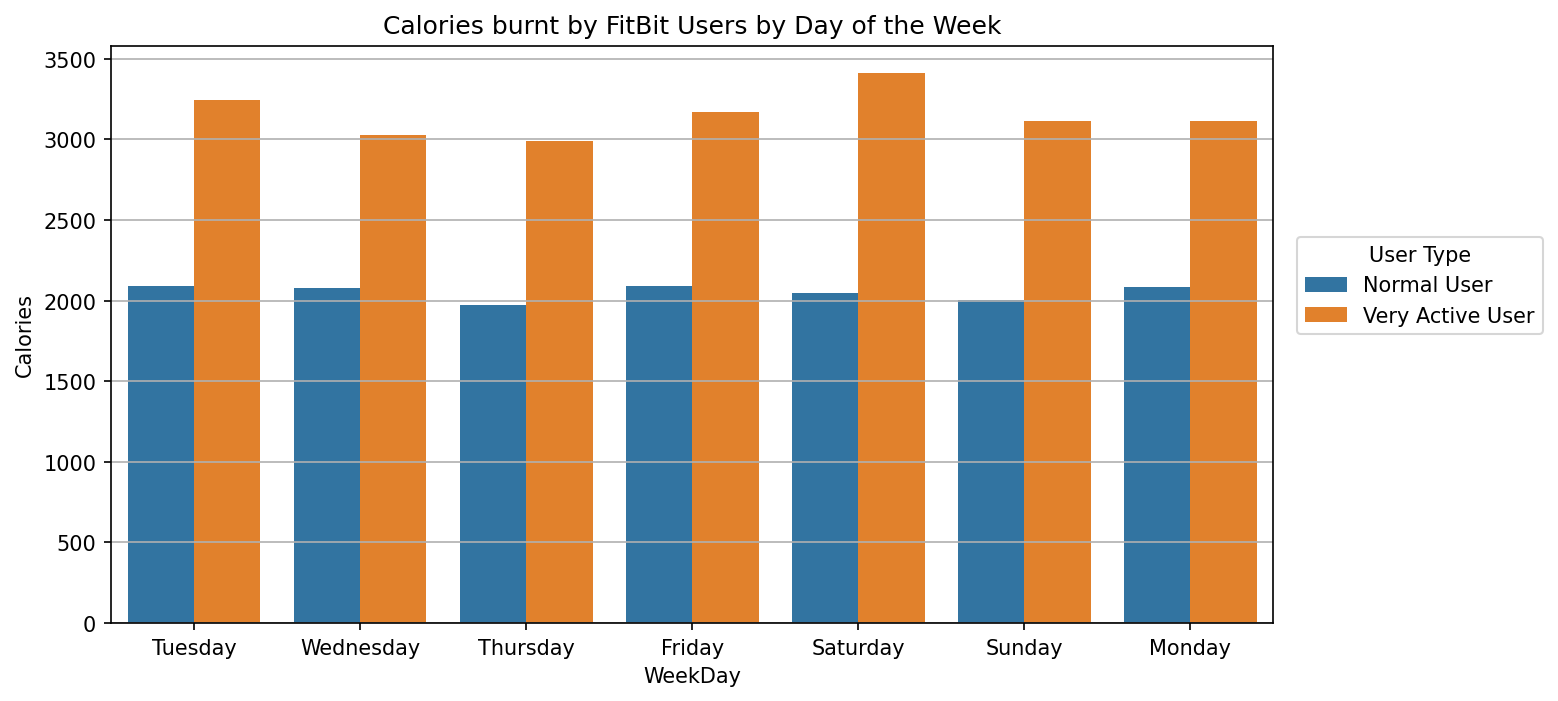

In [44]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(data = Act_log, x= 'WeekDay', y= 'Calories', hue = 'UserType', ci=None)
plt.title('Calories burnt by FitBit Users by Day of the Week')
plt.legend(loc=(1.02,0.5), title='User Type')
plt.grid(axis='y')
plt.show()

* Normal users burnt almost same calories every day. Thursday and Sunday was little lower.
* Very Active Users burnt most calories on Saturday. Saturday is quite understandable being that it is a weekend and the users probably have enough time to exercise.

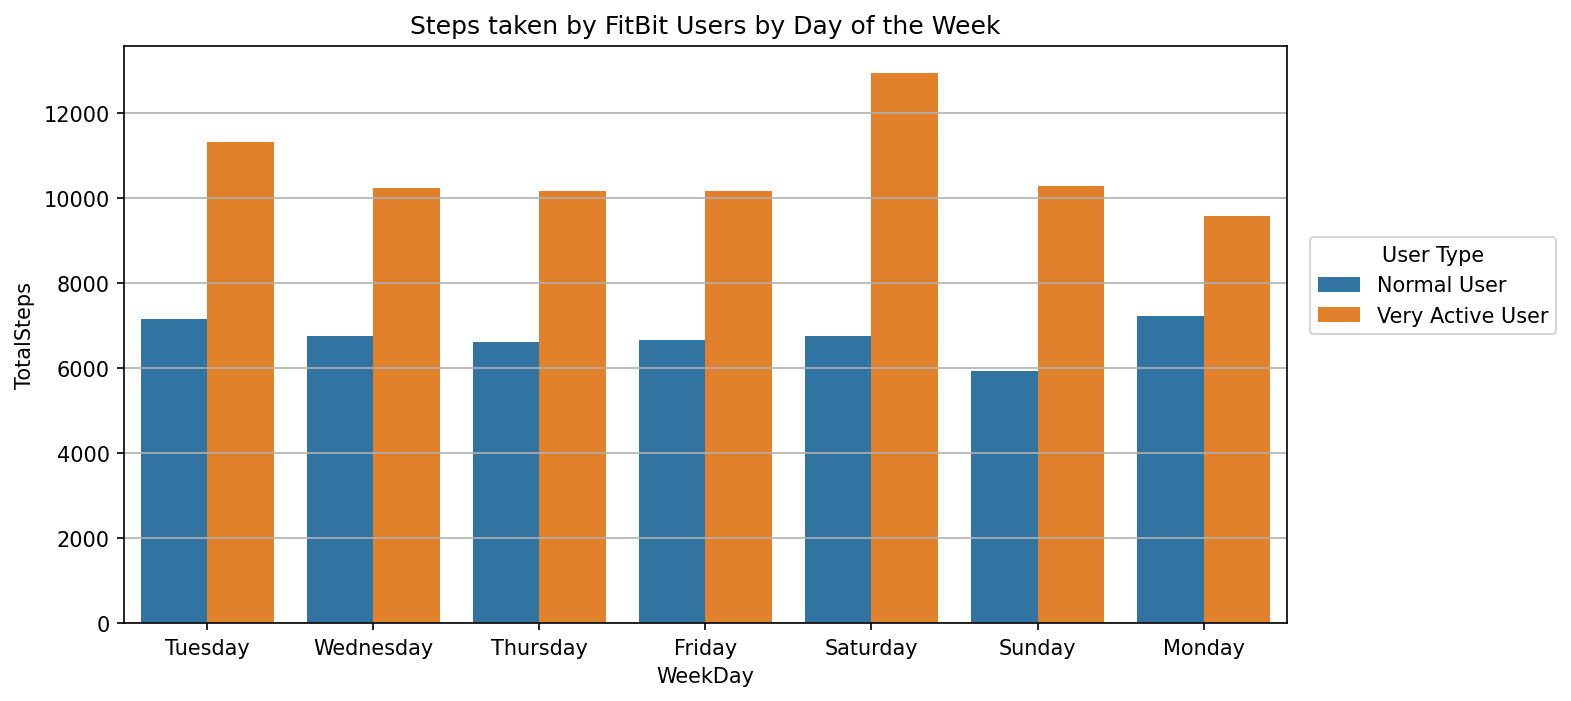

In [45]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(data = Act_log, x= 'WeekDay', y= 'TotalSteps', hue = 'UserType', ci=None)
plt.title('Steps taken by FitBit Users by Day of the Week')
plt.legend(loc=(1.02,0.5), title='User Type')
plt.grid(axis='y')
plt.show()

* Normal users were least active on Sunday. 6000 Steps only.
* Very Active Users were most active on Saturday which is obvious as they also burnt most calories on same day.

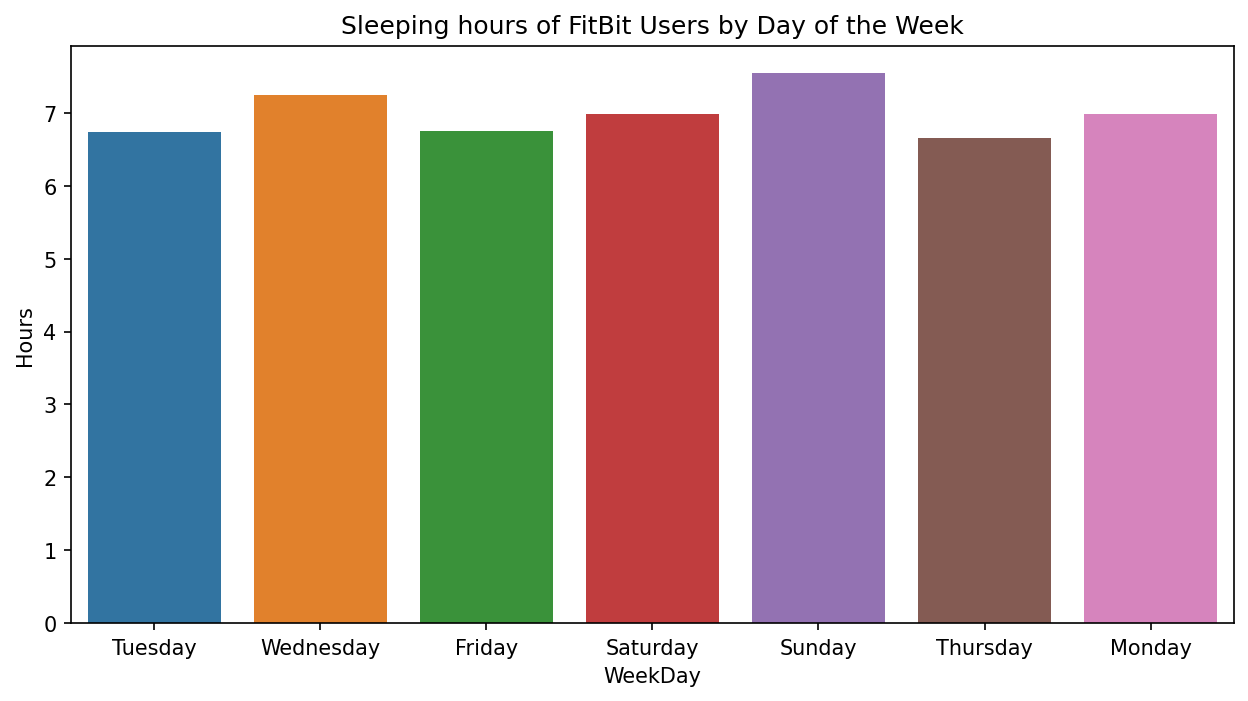

In [46]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(data = merge_Sl_Hr, x= 'WeekDay', y= merge_Sl_Hr['TotalMinutesAsleep']/60, ci=None)
plt.title('Sleeping hours of FitBit Users by Day of the Week')
plt.ylabel('Hours')
plt.show()

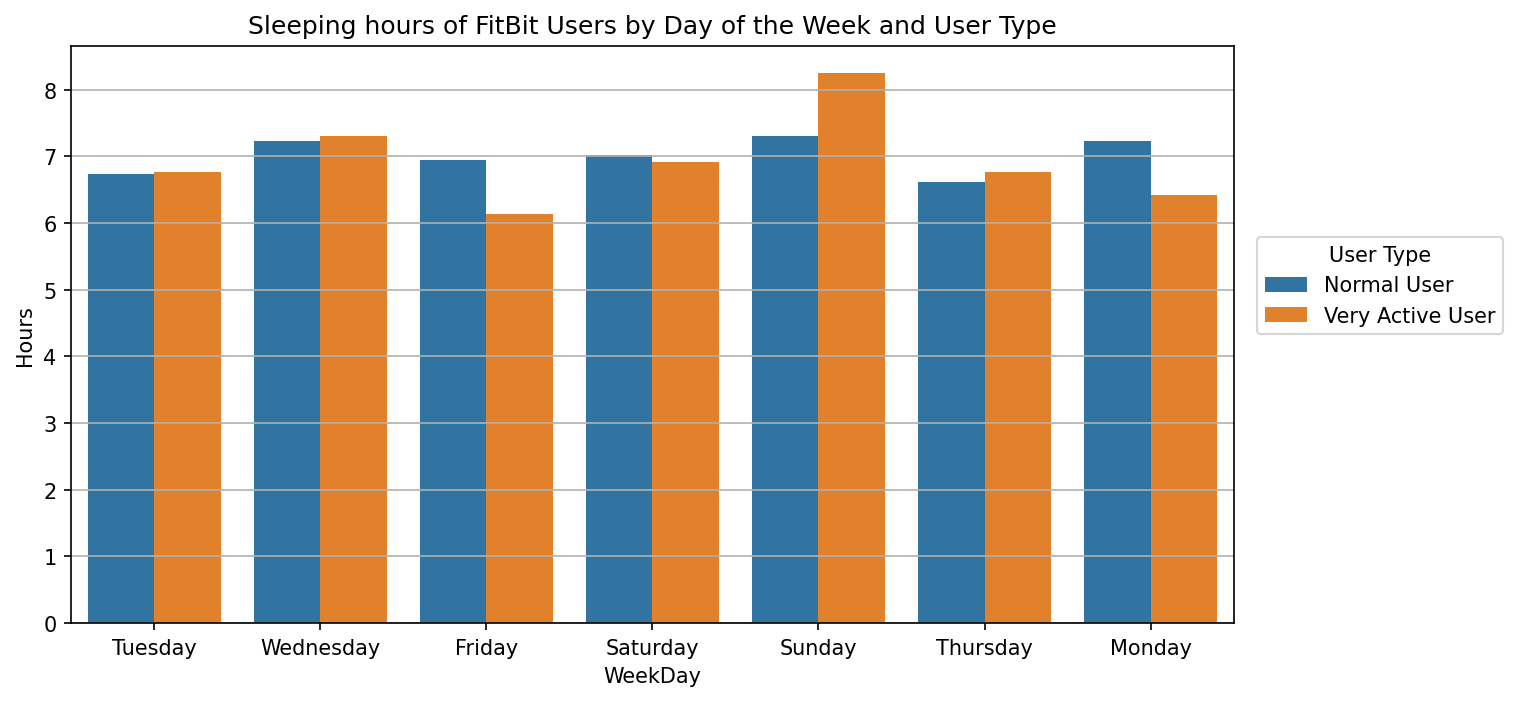

In [47]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(data = merge_Sl_Hr, x= 'WeekDay', y= merge_Sl_Hr['TotalMinutesAsleep']/60, hue='UserType', ci=None)
plt.title('Sleeping hours of FitBit Users by Day of the Week and User Type')
plt.ylabel('Hours')
plt.legend(loc=(1.02,0.5), title='User Type')
plt.grid(axis='y')
plt.show()

* Very Active Users slept longer on Sunday. This could be due to the weekend and also they were most active on previous day.
* All users sleep less than 8 hours/day.

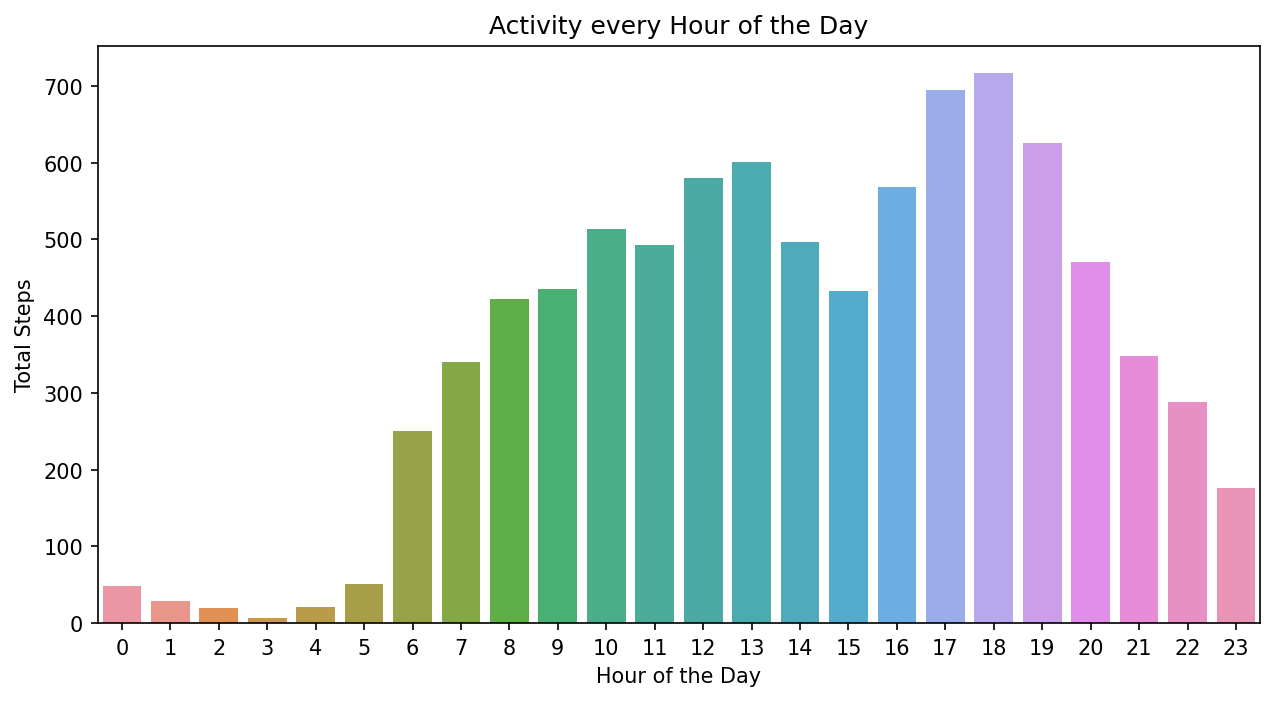

In [48]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(data = merge_Sl_Hr, x= 'DayHour', y= 'StepTotal', ci=None)
plt.title('Activity every Hour of the Day')
plt.ylabel('Total Steps')
plt.xlabel('Hour of the Day')
plt.show()

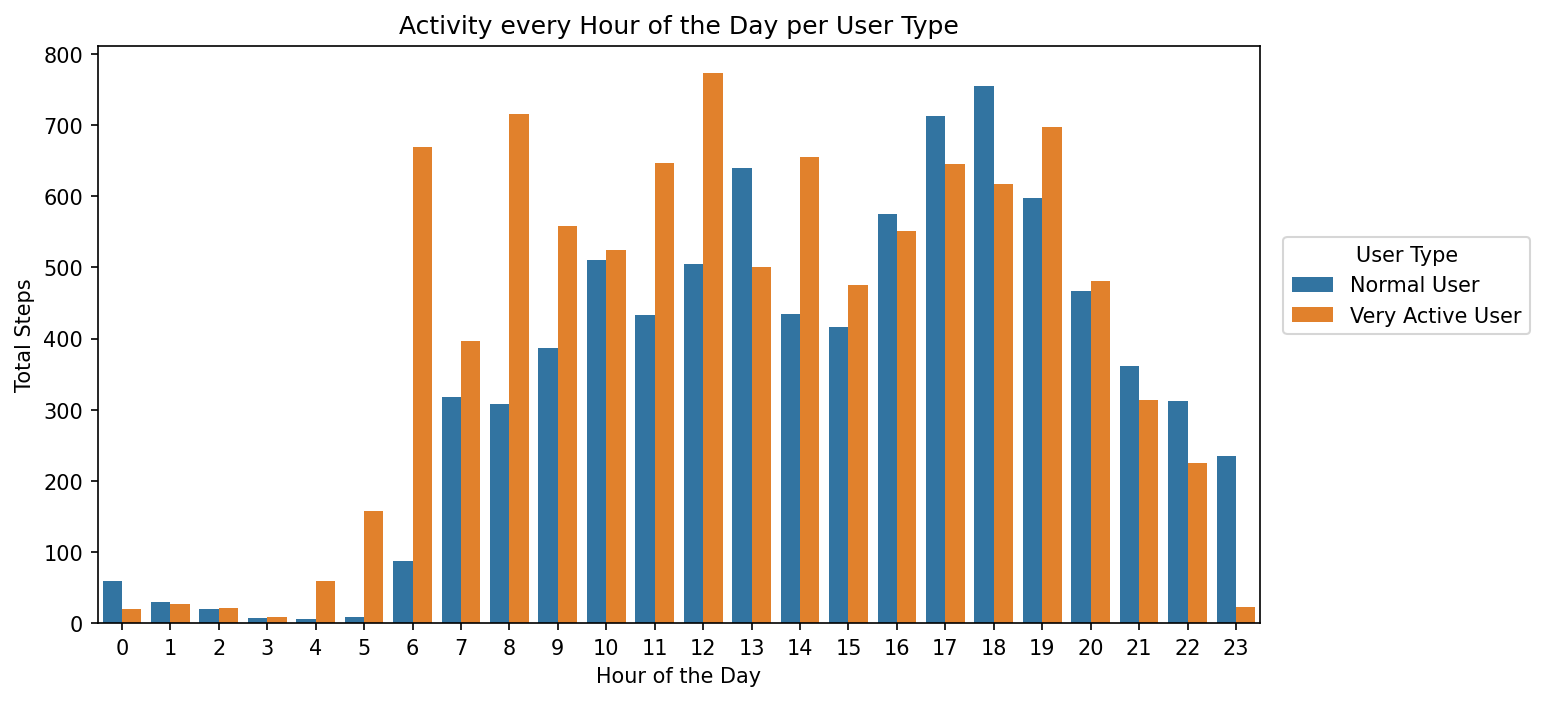

In [49]:
plt.figure(figsize=(10,5), dpi=150)
sns.barplot(data = merge_Sl_Hr, x= 'DayHour', y= 'StepTotal', hue='UserType', ci=None)
plt.title('Activity every Hour of the Day per User Type')
plt.ylabel('Total Steps')
plt.xlabel('Hour of the Day')
plt.legend(loc=(1.02,0.5), title='User Type')
plt.show()

* Very Active Users start their day earlier than Normal Users.
* Very Active Users might be going to Gym or doing high intensity workouts early in the morning.
* Their day starts getting really busy from 8 in the morning all the way to 7 in the evening. The least active hours of the day are between 8 p.m and 11 p.m. These are probably the best hours to reach them with targetted ads.

## 6. Act

### Recommendations:
1. **Notify user on Steps:** We categorized FitBit users into 'Normal User' and 'Very Active User' as per the calories burnt by them per day on average. It was concluded that 'Normal Users' only took 6 to 7 thousand steps per day on average, which is very low than the 10,000 steps per day recommendation. Bellabeat can notify their users whenever they keep falling below this threshold. Suggest high intensity routines which can help burn calories faster in less time. Create a challenging game to motivate users to complete daily steps limit.

2. **Sleep Notifications:** We found that consumers slept less than 8 hours/day. Bellabeat apps can notify about the sleep patterns of their consumers. Also allow to create bedtime schedules and suggest sleeping techniques to the users.

3. **Marketing:** During data analysis, we found that users were less active between 8:00 and 11:00 PM, shortly before they  Scheduling advertisements for a particular time window will also help Bellabeat save money on advertisements.\
\
It is also observed that users spend far more time being inactive than being active. Inactivity is related with several health problems, including obesity, heart disease, etc. Bellabeat can create videos and blog posts to educate its users about the negative impacts of sedentary lifestyle and how to prevent them and at the same time promote thir other products such as Leaf, a wellness tracker that connects to the Bellabeat app to track activity, sleep, and stress.